<a href="https://colab.research.google.com/github/HugoGallardoR/Magister_TI/blob/main/202109221125A4B5E3250F527A7A__DL_tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de Documentos**
En este notebook, experimentarás con el dataset Reuters. Reuters es un dataset de documentos en donde cada documento es representado por un conjunto de palabras desde un vocabulario. El dataset contiene 46 clases. Usaremos un método conveniente de Keras colo para obtener el dataset:

In [20]:
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import time

Obtenemos el dataset y especificamos el número de palabras del vocaulario original que queremos usar. Este número se convertirá en la dimensión de nuestros datos. La función de Keras retorna un array de listas, donde cada lista es una secuencia de índices de palabras en un documento. Por ejemplo, la secuencia [1, 5, 8] significa que las palabras 1, 5, y 8 están contenidas en el documento. Para pre-procesar esta data, la convertiremos en un one-hot encoding (un vector que contiene un valor 1 en la palabra que aparece en el documento)

In [2]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
    
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
train_data = to_one_hot(train_data, 10000)
test_data = to_one_hot(test_data, 10000)

train_data = train_data.astype(np.float32)
test_data = test_data.astype(np.float32)


2121728/2110848 [==============================] - 0s 0us/step


Ahora la data tiene la forma de una matriz con dimensiones NxM, donde N es la cantidad de muestras y M es la dimensión de cada muestra.

In [3]:
print(f'Tamaño de datos de entrenamiento: {train_data.shape}')
print(f'Tamaño de datos de test: {test_data.shape}')

#Existen 8982 muestras para entrenamiento y 2246 muestras para test

Tamaño de datos de entrenamiento: (8982, 10000)
Tamaño de datos de test: (2246, 10000)


## **Tarea**
El objetivo de esta tarea es implementar una red neuronal en Pytorch que nos permita clasificar el dataset Reuters. La red neuronal implementada debe alcanzar al menos un accuracy de 35% sobre el conjunto de test.

## 1. Preparar la data
Empezaremos por preparar la data para poder usarla en Pytorch. Para eso haremos uso de los DataLoaders. En el código inicial, el tamaño de batch está configurado en 1, pero puedes cambiar este valor y experimentar (se sugiere usar valores de batch_size más grandes que uno).

In [23]:
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim
import torch
import torch.nn.functional as F

#Se comienza utilizando un batch_size de 10
train_loader = data.DataLoader(list(zip(train_data, train_labels)), shuffle=True, batch_size=100)
test_loader = data.DataLoader(list(zip(test_data, test_labels)), batch_size=100)

In [11]:
# Cuando iteramos sobre el loader, obtenemos cada mini-batch y lo mostramos en pantalla
# Cada mini-batch es un conjunto de muestras con su respectivo conjunto de etiquetas
for sample in test_loader:
  print(sample)

[tensor([[0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.]]), tensor([ 3, 10,  1,  4,  4,  3,  3,  3,  3,  3,  5,  4,  1,  3,  1, 11, 23,  3,
        19,  3,  8,  3,  3,  3,  9,  3,  4,  6, 10,  3,  3, 10, 20,  1, 19,  4,
        40,  1,  4,  3, 15, 21,  3, 34,  4,  4,  3,  4,  3, 11, 20,  3,  1,  3,
         3,  4, 26,  4, 20, 19,  4,  3,  4,  4,  4,  3,  3,  1,  3,  4, 21, 16,
         3, 19, 43,  2,  1,  3, 39,  4,  3,  3,  3, 11, 19, 20,  1, 11,  4,  3,
         3,  4,  3,  4,  3, 11, 11,  3, 20, 28])]
[tensor([[0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.]]), tensor([ 8,  1, 20,  3,  3,  2,  4,  4

## 2. Creación de red neuronal
A continuación, crea tu red neuronal especificando una clase con los métodos constructor y forward

In [27]:
class RedNeuronal(nn.Module):
  #Constructor es para definiciones de variables. Aquí recibimos como parámetro las dimensiones de la data de entrada
  # y la cantidad de clases de salida
  #OBS:Ocupo redes con 10000 para hacer match con el input
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 10000)
    self.fc2 = nn.Linear(10000, 5000)
    self.fc3 = nn.Linear(5000, output_dim)    
    #Aquí tienes que especificar la arquitectura de tu red.
    
  def forward(self, input):
    #Aquí especificas lo que pasa cuando a la red se le pone datos
    batch_size = input.shape[0]
    #View modifica la forma de la data, para que el input tenga la forma  de batch_size
    input = input.view(batch_size, -1)
    h_1 = F.relu(self.fc1(input))
    h_2 = F.relu(self.fc2(h_1))
    y_pred = self.fc3(h_2)
    #Retorna la salida de la red, y el vector de salida de la segunda capa (Para posterior analisis)
    return y_pred, h_2

Luego, creas una instancia de tu red neuronal. A continuación debes especificar el tamaño de la entrada y el tamaño de la salida para instanciar tu red.

In [13]:
# Creamos el modelo
## Aquí tienes que cambiar estas dimensiones de acuerdo al problema a resolver
INPUT_DIM = 10000
OUTPUT_DIM = 46

model = RedNeuronal(INPUT_DIM, OUTPUT_DIM)

Configuramos el optimizador y la función de Loss

In [15]:
#Crear el objeto para la optimización. 
optimizer = optim.SGD(model.parameters(), lr=0.001)

#Definir la función Loss
#En Pytorch, CrossEntropyLoss incluye la activación Softmax y la función de costo "negative log-likelihood"
#Van juntas por cuestiones de eficiencia

criterion = nn.CrossEntropyLoss()

#En Pytorch nosotros decidimos dónde correr nuestro programa, así que inicializamos el 
# dispositivo dependiendo si tenemos un GPU o no

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Enviamos el modelo y la función Loss al GPU

model = model.to(device)
criterion = criterion.to(device)

In [14]:
#Funciona para calcular el accuracy

def calculate_accuracy(y_pred, y):
  top_pred = y_pred.argmax(1, keepdim=True)
  correct = top_pred.eq(y.view_as(top_pred)).sum()
  acc = correct.float()/y.shape[0]
  return acc

## 3. Entrena tu red neuronal

Entrena tu red neuronal usando Pytorch. Usa el ejemplo de clase para hacer el entrenamiento de tu red.

In [17]:
#Se genera funcion de entrenamiento
#Se usan como inputs todo lo generado anteriormente
#iterator se ingresa la data de training generada con dataloader
def train(model, iterator, optimizer, criterion, device):
  epoch_loss = 0
  epoch_acc = 0
  #Poner la red en modo entrenamiento
  model.train()
  
  #Training loop
  #Se recorre toda la data con X:Valor de entrenamiento, Y:Etiqueta
  for (x, y) in iterator:
    x = x.to(device) #Data
    y = y.long().to(device) #Labels
        
    optimizer.zero_grad() #Limpiar gradientes
    #Enviar data a red      
    y_pred, _ = model(x) 
    #Computar el loss    
    loss = criterion(y_pred, y) 
    #Computar el accuracy   
    acc = calculate_accuracy(y_pred, y) 
    #Computar gradientes    
    loss.backward() 
    #Aplicar reglas de actualizacion    
    optimizer.step() 
        
    epoch_loss += loss.item()
    epoch_acc += acc.item()
        
  return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [18]:
def evaluate(model, iterator, criterion, device):
  epoch_loss = 0
  epoch_acc = 0

  model.eval()
    
  with torch.no_grad(): 
        
    for (x, y) in iterator:
      x = x.to(device)
      y = y.long().to(device)

      y_pred, _ = model(x)

      loss = criterion(y_pred, y)

      acc = calculate_accuracy(y_pred, y)

      epoch_loss += loss.item()
      epoch_acc += acc.item()
  return epoch_loss / len(iterator), epoch_acc / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [30]:
EPOCHS = 30

best_valid_loss = float('inf')
train_loss_history = []
val_loss_history = []

for epoch in range(EPOCHS):
    
  start_time = time.time()

  train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
  valid_loss, valid_acc = evaluate(model, test_loader, criterion, device)

  train_loss_history.append(train_loss)
  val_loss_history.append(valid_loss)
    
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'saved-model.pt')
    
  end_time = time.time()

  epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
  print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
  print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 14s
	Train Loss: 2.225 | Train Acc: 42.66%
	 Val. Loss: 2.223 |  Val. Acc: 43.91%
Epoch: 02 | Epoch Time: 0m 14s
	Train Loss: 2.206 | Train Acc: 44.06%
	 Val. Loss: 2.203 |  Val. Acc: 45.04%
Epoch: 03 | Epoch Time: 0m 14s
	Train Loss: 2.185 | Train Acc: 45.82%
	 Val. Loss: 2.184 |  Val. Acc: 46.86%
Epoch: 04 | Epoch Time: 0m 14s
	Train Loss: 2.166 | Train Acc: 47.02%
	 Val. Loss: 2.165 |  Val. Acc: 47.99%
Epoch: 05 | Epoch Time: 0m 22s
	Train Loss: 2.148 | Train Acc: 47.89%
	 Val. Loss: 2.148 |  Val. Acc: 48.54%
Epoch: 06 | Epoch Time: 0m 15s
	Train Loss: 2.130 | Train Acc: 48.71%
	 Val. Loss: 2.132 |  Val. Acc: 49.28%
Epoch: 07 | Epoch Time: 0m 18s
	Train Loss: 2.113 | Train Acc: 49.33%
	 Val. Loss: 2.116 |  Val. Acc: 49.94%
Epoch: 08 | Epoch Time: 0m 18s
	Train Loss: 2.098 | Train Acc: 49.69%
	 Val. Loss: 2.102 |  Val. Acc: 50.38%
Epoch: 09 | Epoch Time: 0m 22s
	Train Loss: 2.083 | Train Acc: 49.93%
	 Val. Loss: 2.088 |  Val. Acc: 50.73%
Epoch: 10 | Epoch T

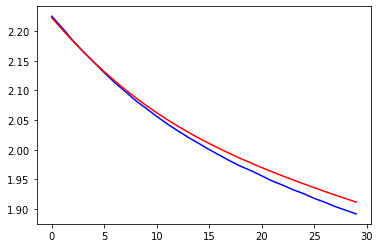

In [31]:
#Visualizar las perdidas
plt.figure()
plt.plot(train_loss_history, color='b')
plt.plot(val_loss_history, color='r')
plt.show()